# Aluno: Luiz Zairo Bastos Viana - Matrícula: 499995

1. Importação de todas as bibliotecas utilizadas

In [32]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  roc_auc_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


2. Leitura do Dataset

In [2]:
df = pd.read_csv("./data/creditcard.csv")
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
86661,61342.0,0.115569,0.531582,1.184137,1.128114,-0.221143,0.296216,-0.088519,-0.712123,-0.201858,...,0.609790,-0.656744,-0.272375,0.010546,1.043276,-0.285514,0.163287,0.197662,45.68,0
70484,53886.0,0.198741,1.086977,0.022097,1.541874,1.135077,-1.323342,-2.014196,-2.859120,-0.596719,...,-1.255635,0.220149,-2.017599,0.408951,0.145567,-0.320271,0.212363,0.298195,1.00,0
152818,97472.0,-1.041191,0.717882,3.053281,4.811622,-0.560688,2.949587,-0.816509,0.777367,1.430017,...,-0.192175,0.240828,-0.273175,-0.024287,0.298245,0.658028,0.523567,0.255092,113.79,0
182839,125569.0,-1.818109,0.422986,1.624732,-0.340463,0.166318,-0.536913,-0.278347,0.556308,-0.081798,...,-0.013976,0.043452,0.444437,1.076768,0.396951,0.436885,-0.123197,-0.039705,2.21,0
225608,144316.0,-0.774326,1.117119,1.409265,0.826969,-0.562705,-0.014409,-0.243526,0.748279,-0.257957,...,0.317663,0.914069,-0.241304,0.028878,-0.086016,-0.371012,0.305956,0.140688,1.00,0


3. Identifique as variáveis independentes e dependentes e associe-as às suas respectivas variáveis

In [3]:
print(f"Lista de colunas: \n{df.columns.tolist()}")

print(f"Quantidade de linhas e colunas: {df.shape}")

print("\n\nDescrição do dataset:")
display(df.describe())

Lista de colunas: 
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Quantidade de linhas e colunas: (284807, 31)


Descrição do dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


4. Identifique se a classe do problema é desbalanceada

In [4]:
classe = df["Class"].value_counts()
data_classe = pd.DataFrame(classe).reset_index()
data_classe.columns = ["Class", "Quantidade"]
data_classe["Class"] = data_classe["Class"].map({0: "Normal", 1: "Fraude"})
print("Quantidade de classes:")
display(data_classe)

Quantidade de classes:


,Class,Quantidade
0,Normal,284315
1,Fraude,492


In [5]:
fig = px.bar(data_classe, x="Class", y="Quantidade", title="Quantidade de classes", color="Class", labels={"Quantidade": "Quantidade de transações", "Class": "Classe"}, height=400, width=800, log_y=True)
fig.show()

### --------------Regressão Logística Univariada--------------

5. Escolha uma coluna do dataset para variável independente - aquela que você considera fazer sentido para predizer a saída - e gere um modelo de regressão logística univariada.
Neste momento, não precisa normalizar os dados, nem gerar divisão treino/teste, nem aplicar grid search/ validação cruzada.

In [6]:
X = df[['Amount']]
y = df['Class']

reg = LogisticRegression()
reg.fit(X, y)


LogisticRegression()

6. Plote o gráfico de como ficaram as classificações dos pontos. Neste momento, ainda não precisa mostrar as métricas de performance (acc, roc_auc, etc)

/home/zairo-bastos/Documentos/Trabalho Final - CD/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



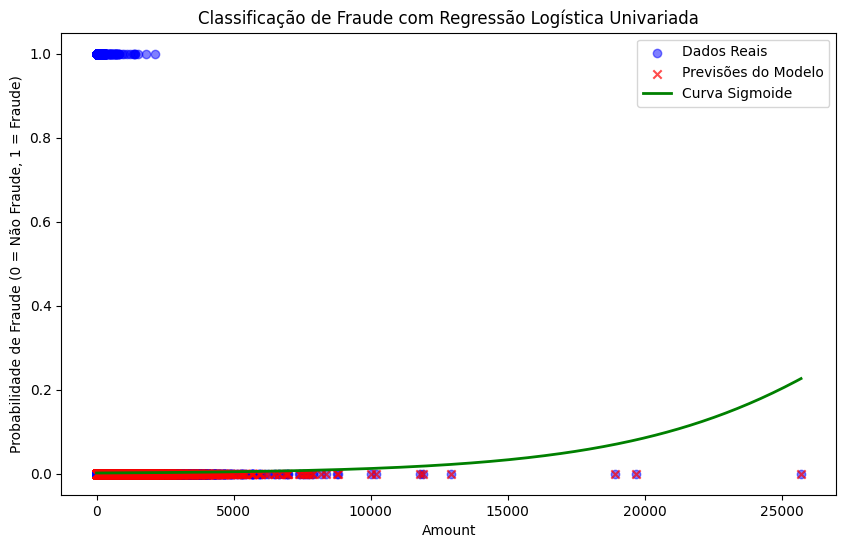

In [7]:
# Fazer predições de probabilidade (para obter a curva sigmoide)
y_prob = reg.predict_proba(X)[:, 1]  # Probabilidade de ser fraude (classe 1)

# Gerar pontos de teste para a curva sigmoide
X_test = np.linspace(X['Amount'].min(), X['Amount'].max(), 300).reshape(-1, 1)
y_test_prob = reg.predict_proba(X_test)[:, 1]

# Plotar os dados reais e predições
plt.figure(figsize=(10, 6))

# Plotando os pontos reais com base em "Class"
plt.scatter(X, y, color='blue', label='Dados Reais', alpha=0.5)

# Plotando as previsões com base em "y_pred"
plt.scatter(X, reg.predict(X), color='red', marker='x', label='Previsões do Modelo', alpha=0.7)

# Plotar a curva sigmoide
plt.plot(X_test, y_test_prob, color='green', label='Curva Sigmoide', linewidth=2)

plt.title('Classificação de Fraude com Regressão Logística Univariada')
plt.xlabel('Amount')
plt.ylabel('Probabilidade de Fraude (0 = Não Fraude, 1 = Fraude)')
plt.legend()
plt.show()

### --------------Normalização, Treino e teste--------------

- OBS: A partir de agora, todos os dados de entrada deverão ser normalizados e todos os modelos gerados deverão ser divididos em conjunto de treino e teste, e validados utilizando as métricas acurácia e matriz de confusão.

- Refaça a questão anterior (gerar um modelo univariado) normalizando os dados, separando os dados em treino e teste, sem plotar gráfico, apenas plotando as saídas das métricas de performance no conjunto de teste.
    - Sem ainda utilizar validação cruzada/ grid search.

7. Normalização dos dados

In [8]:
# Normalizar os dados (padronização z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Dividindo em treino e teste

In [9]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

9. Criando o modelo de Regressão Logistica e treinando

In [10]:
reg2 = LogisticRegression()
reg2.fit(X_train, y_train)

LogisticRegression()

10. Fazendo as predições

In [11]:
y_pred = reg2.predict(X_test)

11. Avaliando o modelo

In [12]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir as métricas
print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')
print('Matriz de Confusão:')
print(conf_matrix)

Acurácia no conjunto de teste: 99.84%
Matriz de Confusão:
[[85307     0]
 [  136     0]]


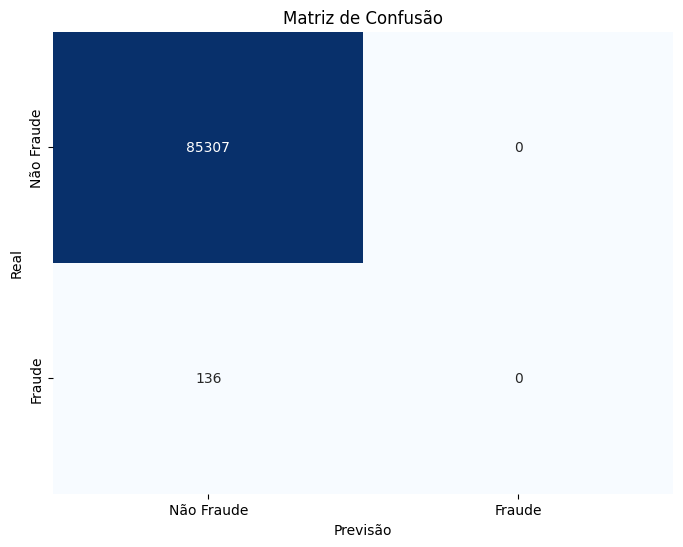

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Não Fraude', 'Fraude'],
            yticklabels=['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

- Gere um modelo de regressão logística multivariado (utilizando agora todas as colunas numéricas das variáveis independentes - exceto a coluna time) e analisar as métricas de avaliação a partir do conjunto de teste.
    - Sem ainda utilizar validação cruzada/ grid search.

12. Definindo as variáveis

In [14]:
X = df.drop(columns=['Time', 'Class']) 
y = df['Class']

13. Normalizando os dados

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

14. Definindo Treino e Teste Multivalorado

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

15. Gerando o modelo e treinando

In [17]:
reg3 = LogisticRegression(max_iter=1000)
reg3.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

16. Predição no conjunto de testes

In [18]:
y_pred = reg3.predict(X_test)

17. Avaliando a acurácia e a matriz de confusão

Acurácia no conjunto de teste: 99.92%


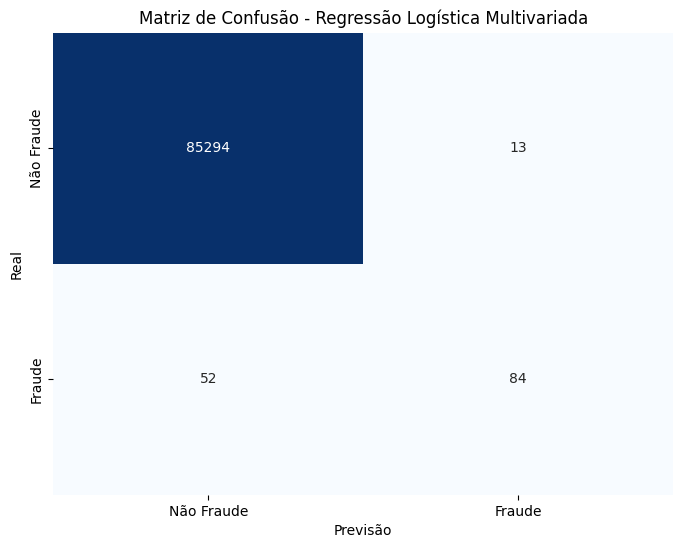

In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a acurácia
print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Não Fraude', 'Fraude'],
            yticklabels=['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão - Regressão Logística Multivariada')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

### --------------Dataset desbalanceado?--------------

- Refaça o modelo de Regressão Logística Multivariado anterior aplicando técnicas de balanceamento de dados (undersampling E oversampling), caso o dataset seja desbalanceado.
- (Não esqueça de utilizar as métricas de performance corretas para avaliar o resultado desbalanceado)
- Para esta seção, faça validação cruzada (k-fold, para k=5)

18. Aplicando o undersampling

In [34]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

19. Aplicando o Oversampling

In [35]:
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

20. Criando o Modelo de Regressão Logistica

In [36]:
model = LogisticRegression(max_iter=1000, random_state=42)

21. Função para realizar a avaliação

In [37]:
def avaliar_modelo(X_train, y_train):
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')  # Usando F1-Score
    print(f"Resultados da validação cruzada (F1-Score): {results}")
    print(f"Média do F1-Score: {results.mean()}")

22. Resultados:

In [38]:
print("Resultados com Undersampling:")
avaliar_modelo(X_train_under, y_train_under)

print("\nResultados com Oversampling (SMOTE):")
avaliar_modelo(X_train_over, y_train_over)

Resultados com Undersampling:
Resultados da validação cruzada (F1-Score): [0.91666667 0.94656489 0.93233083 0.94047619 0.92957746]
Média do F1-Score: 0.9331232068990885

Resultados com Oversampling (SMOTE):
Resultados da validação cruzada (F1-Score): [0.94194984 0.94305328 0.94313163 0.94206986 0.94373213]
Média do F1-Score: 0.9427873479174718


23. Treinar o modelo final com o SMOTE e avaliar no conjunto de teste

In [39]:
model.fit(X_train_over, y_train_over)
y_pred = model.predict(X_test)

print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_pred))
print("\nF1-Score no conjunto de teste:", f1_score(y_test, y_pred))


Matriz de Confusão:
 [[82977  2330]
 [   10   126]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443


AUC-ROC Score: 0.9495787360391774

F1-Score no conjunto de teste: 0.09722222222222222


### Compare os resultados dos melhores modelos gerados com e sem reamostragem de dados e veja se houve diferença.

24. Resultados sem reamostragem:

In [41]:
print("Resultados SEM reamostragem:")
model.fit(X_train, y_train)
y_pred_no_resample = model.predict(X_test)

print("\nMatriz de Confusão SEM reamostragem:\n", confusion_matrix(y_test, y_pred_no_resample))
print("\nRelatório de Classificação SEM reamostragem:\n", classification_report(y_test, y_pred_no_resample))
print("\nAUC-ROC SEM reamostragem:", roc_auc_score(y_test, y_pred_no_resample))
print("\nF1-Score SEM reamostragem:", f1_score(y_test, y_pred_no_resample))

Resultados SEM reamostragem:

Matriz de Confusão SEM reamostragem:
 [[85294    13]
 [   52    84]]

Relatório de Classificação SEM reamostragem:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.62      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


AUC-ROC SEM reamostragem: 0.8087473340233441

F1-Score SEM reamostragem: 0.721030042918455


25. Resultados com Undersampling

In [42]:
print("\nResultados com Undersampling:")
model.fit(X_train_under, y_train_under)
y_pred_under = model.predict(X_test)
print("\nMatriz de Confusão com Undersampling:\n", confusion_matrix(y_test, y_pred_under))
print("\nRelatório de Classificação com Undersampling:\n", classification_report(y_test, y_pred_under))
print("\nAUC-ROC com Undersampling:", roc_auc_score(y_test, y_pred_under))
print("\nF1-Score com Undersampling:", f1_score(y_test, y_pred_under))



Resultados com Undersampling:

Matriz de Confusão com Undersampling:
 [[81975  3332]
 [    9   127]]

Relatório de Classificação com Undersampling:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443


AUC-ROC com Undersampling: 0.9473823005352985

F1-Score com Undersampling: 0.07065368567454798


26. Resultados com o Oversampling

In [43]:
print("\nResultados com Oversampling (SMOTE):")
model.fit(X_train_over, y_train_over)
y_pred_over = model.predict(X_test)
print("\nMatriz de Confusão com Oversampling (SMOTE):\n", confusion_matrix(y_test, y_pred_over))
print("\nRelatório de Classificação com Oversampling (SMOTE):\n", classification_report(y_test, y_pred_over))
print("\nAUC-ROC com Oversampling (SMOTE):", roc_auc_score(y_test, y_pred_over))
print("\nF1-Score com Oversampling (SMOTE):", f1_score(y_test, y_pred_over))


Resultados com Oversampling (SMOTE):

Matriz de Confusão com Oversampling (SMOTE):
 [[82977  2330]
 [   10   126]]

Relatório de Classificação com Oversampling (SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443


AUC-ROC com Oversampling (SMOTE): 0.9495787360391774

F1-Score com Oversampling (SMOTE): 0.09722222222222222
